In [1]:
# Load required packages

from __future__ import print_function
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
import scipy
from statistics import mean

In [2]:
# Load pickled data

dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

In [3]:
# Wavelength, Flux and Uncertainty arrays for supernova '11hs'.

wvl = dataset5["11hs"].wavelengths
y_11hs = dataset5["11hs"].data
flux = y_11hs.astype('float64')
uncer = dataset5["11hs"].smooth_uncertainty['Ph4.83']

In [4]:
# Function that throws away unused data points in the new bins.

N = 10
nw = len(wvl)
nbins = float(nw)/N
rembin = int(nbins)
rembin2 = rembin*N
unpairedbins = nw - rembin2
def evenodd(nbin):
    if float(nbins).is_integer():
        k = (0, 0)
    else:
        if (unpairedbins % 2) == 0:
            k = (int(unpairedbins/2), int(unpairedbins/2))
        else:
            k = (int(unpairedbins/2), int(unpairedbins/2+1))
    return k
unpaired = evenodd(nbins)
l = unpaired[0]
m = unpaired[1]

In [5]:
# Function that reduces the resolution of a given spectrum by an integer N. It takes 
# wavelength, flux and uncertainty arrays as input and gives back the new wavelength, flux and uncertainty arrays
# of the reduced resolution spectrum.

def binspectra(wvl, flux, uncer, N):
    wnew = [wvl[i:i+N].sum()/N for i in range(0+l,len(wvl)-m,N)]
    wnew = np.asarray(wnew)
    fnew = [flux[i:i+N].sum() for i in range(0+l,len(wvl)-m,N)]
    fnew = np.asarray(fnew)
    uncernew = [np.sqrt(np.sum(np.square(uncer[i:i+N]))) for i in range(0+l,len(wvl)-m,N)]
    uncernew = np.asarray(uncernew)
    return wnew, fnew, uncernew

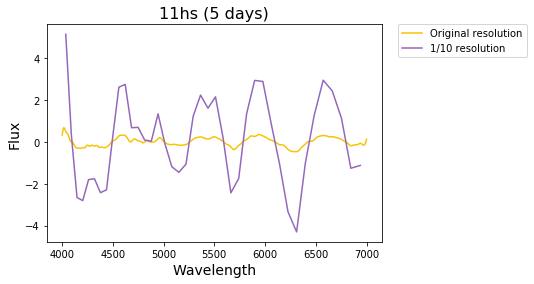

In [6]:
# An example, here we decrease the resolution of the spectrum of supernova "11hs" by factor of 10 
# and plot the two spectra without the uncerainty arrays.


newspectra10 = binspectra(wvl, flux, uncer, N)
plt.plot(wvl, flux, c='xkcd:goldenrod', label="Original resolution")
plt.plot(newspectra10[0], newspectra10[1], c='tab:purple', label="1/10 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

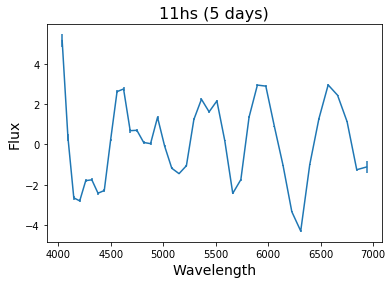

In [22]:
# Plot of spectrum of "11hs" reduced by factor of 10 with the uncerainty.

newspectra10 = binspectra(wvl, flux, uncer, N)
x = newspectra10[0]
y = newspectra10[1]
yer = newspectra10[2]
plt.errorbar(x, y, yerr=yer, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=True, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, data=None)
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.title('11hs (5 days)', fontsize=16)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()